<a href="https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Intern Challenge**

In [1]:
# Importing the standard libraries for data analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Creating dataframes for each dataset
card_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-cards.csv"

customers_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-customers.csv"

fraud_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63\
/dataset-frauds.csv"

transactions_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-transactions.csv"


df_card = pd.read_csv(card_url, sep=';')

df_customers = pd.read_csv(customers_url, sep=';')

df_fraud = pd.read_csv(fraud_url, sep=';')

df_transactions = pd.read_csv(transactions_url, sep=';')



1.   *Extract and analyze the data in order to answer the following questions. Provide a description and/or comments for each solution.*



In [3]:
# AVERAGE AGE OF THE CUSTOMERS IN THE DATABASE

# getting the column age and turning it into a numpy array
age = np.array(df_customers['age']) 

# getting the average age
avg_age = age.mean()
# printing the average age rounded to two decimal places
print("The average age of the customers in the database is {} years old."\
      .format(round(avg_age, 2)))

The average age of the customers in the database is 35.06 years old.


*How is the card_family ranked based on the credit_limit given to each card?*

Checking the quantity of each card family in the dataset so I don't draw any biased conclusion about the average credit limit for each family.

In [4]:
# getting all the card families in the dataset
card_families = np.unique(df_card['card_family'])

# getting the quantity of each card family in the dataset
family_quantity = [(family, df_card['card_family'].loc\
                    [df_card.card_family == family]\
                   .count()) for family in card_families]

# sorting in place by quantity (descending order)
family_quantity.sort(key=lambda qty: qty[1], reverse=True)

# unzipping family_quantity (separating family from quantity)
family_quantity = zip(*family_quantity)
family_quantity = list(family_quantity)

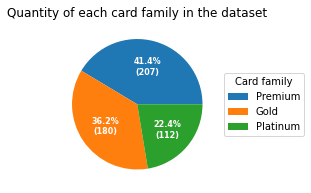

In [5]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = family_quantity[1]
card_families = family_quantity[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Card family",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantity of each card family in the dataset")

plt.show()


Plotting the average credit limit for each card family in the dataset.

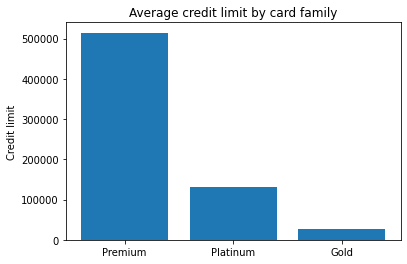

In [6]:
# getting the average credit limit for each card family in the dataset
avg_credit_limit = [(family, np.array(df_card['credit_limit'].loc\
                                      [df_card.card_family == family]).mean())\
                     for family in card_families]

# sorting in place by credit_limit (descending order)
avg_credit_limit.sort(key=lambda family_credit_limit: family_credit_limit[1], \
                      reverse=True)

# unzipping avg_credit_limit
avg_credit_limit = zip(*avg_credit_limit)
avg_credit_limit = list(avg_credit_limit)

# plotting the average credit limit
plt.bar(avg_credit_limit[0], avg_credit_limit[1])
plt.title("Average credit limit by card family")
plt.ylabel("Credit limit")
plt.show()

In [7]:
# TODO

*For the transactions flagged as fraud, what are the ids of the transactions with the highest value?*

In [8]:
# getting the transactions flagged as fraud (sorted in descending order by value)
frauds = np.array(df_fraud['transaction_id'].loc[df_fraud['fraud_flag'] == True])
df_fraud_transactions = df_transactions.loc[df_transactions['id'].isin(frauds)]
df_fraud_transactions = df_fraud_transactions.sort_values(by='value', \
                                                          ascending=False)
np.array(df_fraud_transactions['id'])

array(['CTID20567160', 'CTID15034243', 'CTID95884307', 'CTID54759604',
       'CTID55429304', 'CTID29469747', 'CTID76723439', 'CTID85085771',
       'CTID25962688', 'CTID60575167', 'CTID42980186', 'CTID63762180',
       'CTID31867370', 'CTID40881434', 'CTID41847490', 'CTID81479835',
       'CTID89116114', 'CTID30763806', 'CTID32907279', 'CTID23350804',
       'CTID69782227', 'CTID96772424', 'CTID26134025', 'CTID89260233',
       'CTID12270763', 'CTID26238474', 'CTID53972836', 'CTID91108283',
       'CTID84024131', 'CTID98722314', 'CTID89585938', 'CTID21246201',
       'CTID39550827', 'CTID49517337', 'CTID55853142', 'CTID57707566',
       'CTID42582298', 'CTID55936882', 'CTID16281374', 'CTID57357592',
       'CTID95859840', 'CTID71795114', 'CTID22306254', 'CTID37742156',
       'CTID13865418', 'CTID88342446', 'CTID97760025', 'CTID87470159',
       'CTID70746134', 'CTID57993591', 'CTID60614984', 'CTID38789752',
       'CTID68050021', 'CTID56680308', 'CTID84579664', 'CTID59571587',
      

In [9]:
df_cards_involved_in_fraud = df_card.loc[df_card['card_number'].isin(df_fraud_transactions['card_number'])]

In [10]:
cards = np.unique(df_cards_involved_in_fraud['card_number'])

higher = 0

for card in cards:
  transactions = df_fraud_transactions['value'].loc[df_fraud_transactions['card_number'] == card]
  card_limit = df_cards_involved_in_fraud['credit_limit'].loc[df_cards_involved_in_fraud['card_number'] == card]
  for transaction in transactions:
    if transaction >= int(card_limit):
      higher += 1

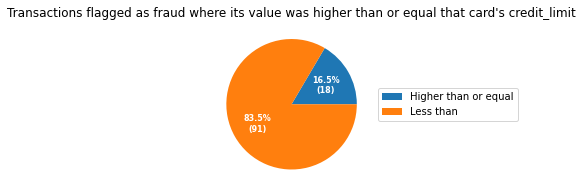

In [11]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = [higher, df_fraud_transactions['id'].count()-higher]
card_families = ["Higher than or equal", "Less than"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Transactions flagged as fraud where its value was higher than or equal that card's credit_limit")

plt.show()

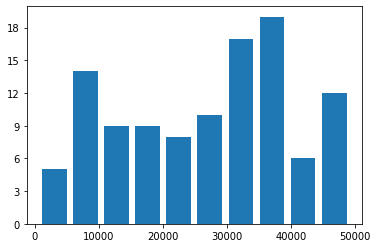

In [12]:
plt.yticks([i for i in range(0, 19, 3)])
plt.hist(df_fraud_transactions['value'], rwidth=0.8)
plt.show()

In [13]:
customers = np.unique(df_cards_involved_in_fraud['customer_id'])

customer_cards_involved_in_frauds = df_customers.loc[df_customers['id'].isin(customers)]

In [14]:
avg_age_frauds = customer_cards_involved_in_frauds['age'].mean()
print("Average age of customers whose cards where involved in fraud: {} years old.".format(round(avg_age_frauds, 2)))

Average age of customers whose cards where involved in fraud: 34.66 years old.


In [15]:
families = np.unique(customer_cards_involved_in_frauds['segment']) 
data = [(seg, customer_cards_involved_in_frauds['segment'].loc[customer_cards_involved_in_frauds['segment'] == seg].count()) for seg in families]
data

[('Diamond', 48), ('Gold', 25), ('Platinum', 24)]

In [16]:
data = zip(*data)
data1 = list(data)
data1

[('Diamond', 'Gold', 'Platinum'), (48, 25, 24)]

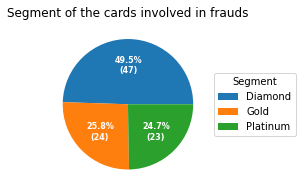

In [17]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="Segment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Segment of the cards involved in frauds")

plt.show()

In [18]:
vg = np.unique(customer_cards_involved_in_frauds['vintage_group']) 
data = [(v, customer_cards_involved_in_frauds['vintage_group'].loc[customer_cards_involved_in_frauds['vintage_group'] == v].count()) for v in vg]
data

[('VG1', 48), ('VG2', 24), ('VG3', 25)]

In [19]:
data = zip(*data)
data1 = list(data)
data1

[('VG1', 'VG2', 'VG3'), (48, 24, 25)]

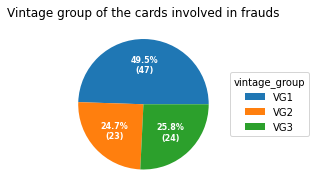

In [20]:
# Plotting a pie plot

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = data1[1]
card_families = data1[0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, card_families,
          title="vintage_group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Vintage group of the cards involved in frauds")

plt.show()

In [21]:
df_transactions['is_fraud'] = [0 for i in range(df_transactions['id'].count())]
df_transactions

,id,card_number,transaction_date,value,segment,is_fraud
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25,0
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16,0
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14,0
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17,0
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14,0
...,...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18,0
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12,0
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13,0
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14,0


In [22]:
frauds = np.array(df_fraud_transactions['id'])
for fraud in frauds:
  df_transactions['is_fraud'].loc[df_transactions['id'] == fraud] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
segments = list(df_transactions['segment'])

new_seg = [int(i[3:]) for i in segments]
segments = new_seg

df_transactions['segment'] = segments
df_transactions

,id,card_number,transaction_date,value,segment,is_fraud
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,25,0
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,16,0
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,14,0
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,17,0
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,14,0
...,...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,18,0
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,12,0
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,13,0
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,14,0
